<a href="https://colab.research.google.com/github/AviratGupta/Geeksman-AISquad-project1-AVIRAT/blob/master/project_finger_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Finger detection is an interesting topic to explore in image processing, especially when it is applied in human-computer interaction.

google drive folder link.

(https://drive.google.com/drive/folders/17kOzD3VSzUKqMXBOZrFB8xlamxELjupV?usp=sharing)

In [ ]:
%%html
<marquee style='width: 70%; height:70%; color: green;'><b>welcome to my project</b></marquee>

# **Overview**

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Setting up an environment for kaggle api.

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

To download the required dataset by copying api from kaggle and run in command line.we use ! in google colab to execute any command.


In [3]:
!kaggle datasets download -d aviratgupta/finger-identify

 97% 43.0M/44.2M [00:01<00:00, 26.4MB/s]
100% 44.2M/44.2M [00:01<00:00, 36.6MB/s]


unzipping the zip file which we have downloaded by command line.

In [ ]:
!unzip "*.zip"

# importing important libraries like fastai,warning.

we ignore all the warnings we ger in future using "ignore".

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

initialising batch size as 64.

Batch size is a term used in deep learning and refers to the number of training examples utilized in one iteration.

In [6]:
bs = 64 

we have to give a path to shows images and we can also give the transformation so that machine can read both normal and flipped image.

In [7]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("fingers/fingers"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

some sample images on our dataset.

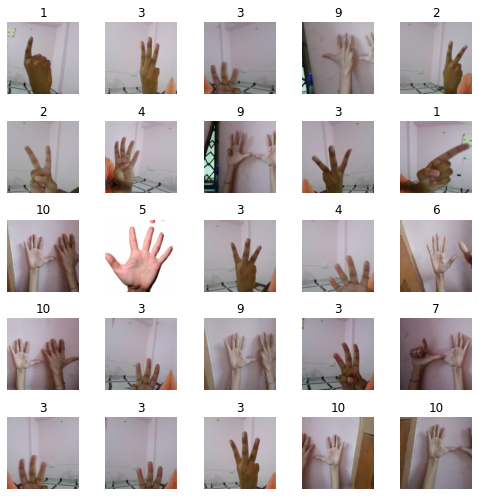

In [8]:
data.show_batch(rows=5, figsize=(7,7))

In [10]:
print(data.classes)
len(data.classes)

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


10

# Time to learn our model..

The most important functions of this module are cnn_learner. They will help you define a Learner using a pretrained model.

***resnet 50***

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.
here we are using fingers as object.

In [11]:
%%time
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



CPU times: user 1.2 s, sys: 519 ms, total: 1.72 s
Wall time: 2.13 s


fit_one_cycle will launch a training using the 1cycle policy to help you train your model faster.

here 4 is the number of time we want to train our model known as epochs.

In [13]:
%%time
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.274044,0.078003,0.968085,00:24
1,0.245756,0.014794,0.994681,00:24
2,0.222122,0.012946,1.000000,00:23
3,0.206071,0.011577,1.000000,00:23


CPU times: user 20.6 s, sys: 14.5 s, total: 35.1 s
Wall time: 1min 36s


till now , we have train our model.

Now we have to save in our google drive using (os.mkdir)

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


makedirs() creates all the intermediate directories if they don't exist (just like mkdir -p in bash).

mkdir() can create a single sub-directory, and will throw an exception if intermediate directories that don't exist are specified.

we create a folder named project.

In [15]:
os.makedirs("/content/drive/My Drive/project",exist_ok=True)

In [16]:
my_dir="/content/drive/My Drive/project"

we now save our model using learn.save.

In [18]:
learn.save(my_dir+"/Stage-1")

We will now load our trained data.

In [19]:
learn.load("/content/drive/My Drive/project/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (752 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
9,9,9,9,9
Path: fingers/fingers;

Valid: LabelList (188 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,4,2,3,7
Path: fingers/fingers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, 

we will make a export.pkl file from inbuilt library pickle from python.


In [20]:
learn.export(my_dir+"/export.pkl")

In [21]:
!pip install -U kora
from kora.drive import upload_public
my_url = upload_public(my_dir+"/export.pkl")
my_url

'https://drive.google.com/uc?id=1ny6XSR4XJBO7im0s7F0TClGEWewcLZXY'

performing classification of our images.

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

prediction of our images.

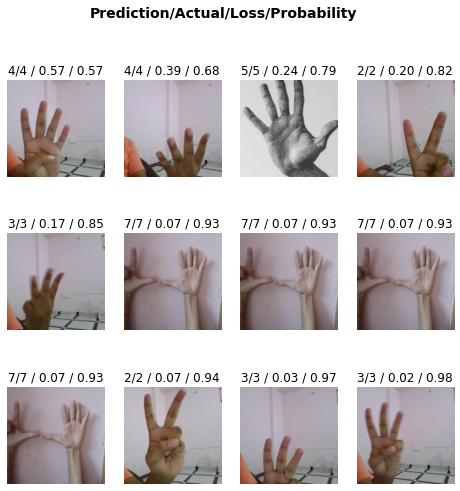

In [23]:
interp.plot_top_losses(12, figsize=(8,8))

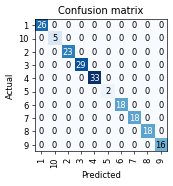

In [24]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[]